In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
rating=pd.read_csv('datasets/ratings.csv')
movie=pd.read_csv('datasets/movies.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie.shape

(10329, 3)

In [5]:
rating.shape

(105339, 4)

In [6]:
df=pd.merge(rating,movie,on='movieId')
df.tail()

,userId,movieId,rating,timestamp,title,genres
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105338,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama


In [7]:
from datetime import datetime,date

In [8]:
df['datetime']=pd.to_datetime(df['timestamp'])
df['datetime']

0        1970-01-01 00:00:01.217897793
1        1970-01-01 00:00:00.842686699
2        1970-01-01 00:00:01.144396284
3        1970-01-01 00:00:00.963468757
4        1970-01-01 00:00:00.836820223
                      ...             
105334   1970-01-01 00:00:01.450415424
105335   1970-01-01 00:00:01.443288791
105336   1970-01-01 00:00:01.442679119
105337   1970-01-01 00:00:01.451535844
105338   1970-01-01 00:00:01.451535889
Name: datetime, Length: 105339, dtype: datetime64[ns]

In [9]:
df.nunique()

userId         668
movieId      10325
rating          10
timestamp    84686
title        10323
genres         938
datetime     84686
dtype: int64

In [10]:
df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [11]:
# Average rating
avg_rating = df
avg_rating = avg_rating.groupby('title')['rating'].mean()
avg_rating

title
'71 (2014)                                       3.500000
'Hellboy': The Seeds of Creation (2004)          3.000000
'Round Midnight (1986)                           2.500000
'Til There Was You (1997)                        4.000000
'burbs, The (1989)                               3.125000
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)    4.500000
xXx (2002)                                       2.958333
xXx: State of the Union (2005)                   2.071429
¡Three Amigos! (1986)                            3.012500
À nous la liberté (Freedom for Us) (1931)        3.000000
Name: rating, Length: 10323, dtype: float64

In [12]:
sorted_rating=avg_rating.sort_values(ascending=False)
sorted_rating

title
Being Human (1993)                                   5.0
Three Ages (1923)                                    5.0
The Liberator (2013)                                 5.0
October Baby (2011)                                  5.0
Resident Evil: Retribution (2012)                    5.0
                                                    ... 
Day Night Day Night (2006)                           0.5
The Aztec Mummy Against the Humanoid Robot (1958)    0.5
Angels in America (2003)                             0.5
Blood of a Poet, The (Sang d'un poète, Le) (1930)    0.5
It's Pat (1994)                                      0.5
Name: rating, Length: 10323, dtype: float64

In [13]:
# Total no.of rating for each movie
tot_rating=df.groupby('title')['rating'].count()
tot_rating.tail()

title
loudQUIETloud: A Film About the Pixies (2006)     1
xXx (2002)                                       24
xXx: State of the Union (2005)                    7
¡Three Amigos! (1986)                            40
À nous la liberté (Freedom for Us) (1931)         1
Name: rating, dtype: int64

In [14]:
new_df=pd.DataFrame()
new_df['Average_rating']=avg_rating
new_df['Total rating Count']=tot_rating
new_df.head()

,Average_rating,Total rating Count
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [15]:
new_df['Total rating Count'].value_counts()

1      3638
2      1454
3       836
4       539
5       485
       ... 
294       1
222       1
158       1
150       1
311       1
Name: Total rating Count, Length: 184, dtype: int64

<AxesSubplot:>

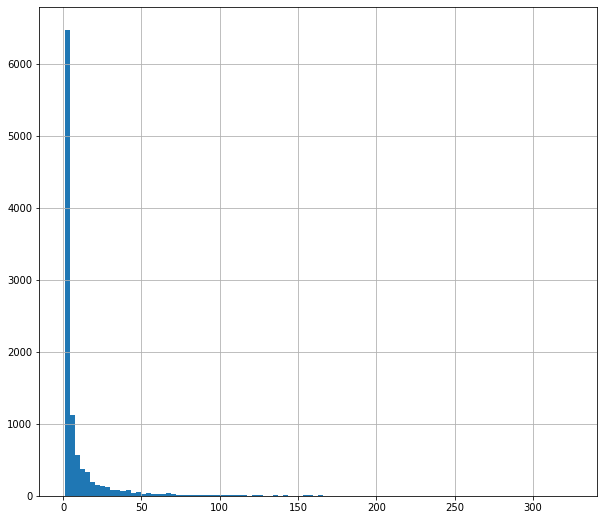

In [16]:
plt.figure(figsize=(10,9))
new_df['Total rating Count'].hist(bins=100)

<AxesSubplot:>

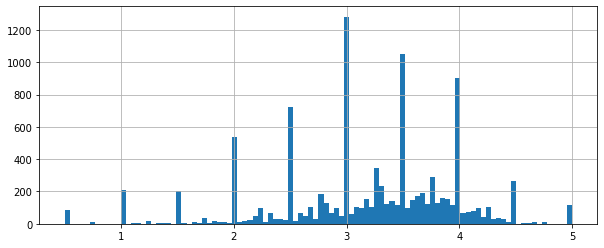

In [17]:
plt.figure(figsize=(10,4))
new_df['Average_rating'].hist(bins=100)

<Figure size 720x576 with 0 Axes>

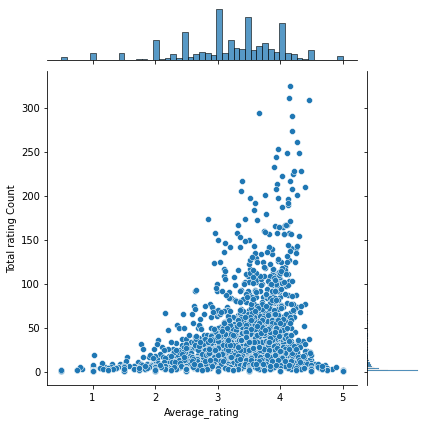

In [18]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Average_rating',y='Total rating Count',data=new_df)

In [19]:
moviematrix = df.pivot_table(index='userId',columns='title',values='rating')
moviematrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [20]:
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       ...
       '[REC] (2007)', '[REC]² (2009)', '[REC]³ 3 Génesis (2012)',
       'a/k/a Tommy Chong (2005)', 'eXistenZ (1999)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=10323)

In [21]:
moviematrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
664    NaN
665    NaN
666    NaN
667    NaN
668    3.5
Name: xXx (2002), Length: 668, dtype: float64

In [22]:
xxx2002_ratings=moviematrix['xXx (2002)']

In [24]:
xxx2002_ratings.tail()

userId
664    NaN
665    NaN
666    NaN
667    NaN
668    3.5
Name: xXx (2002), dtype: float64

In [27]:
movies_similar_to_xxx2002=moviematrix.corrwith(xxx2002_ratings)
movies_similar_to_xxx2002

title
'71 (2014)                                            NaN
'Hellboy': The Seeds of Creation (2004)               NaN
'Round Midnight (1986)                                NaN
'Til There Was You (1997)                             NaN
'burbs, The (1989)                              -0.244851
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)         NaN
xXx (2002)                                       1.000000
xXx: State of the Union (2005)                   0.936864
¡Three Amigos! (1986)                           -0.307941
À nous la liberté (Freedom for Us) (1931)             NaN
Length: 10323, dtype: float64

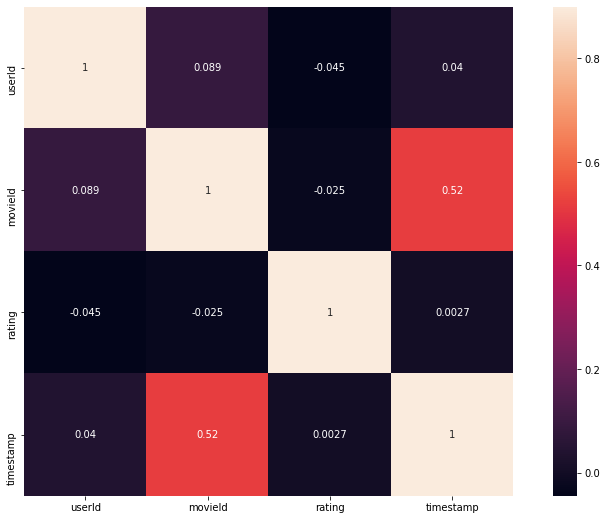

In [30]:
correlation_matrix=df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix,annot=True,vmax=.9,square=True)
plt.show()

In [33]:
xxx2002_corr=pd.DataFrame(movies_similar_to_xxx2002,columns=['Correlation'])
xxx2002_corr.dropna(inplace=True)
xxx2002_corr

,Correlation
title,
"'burbs, The (1989)",-0.244851
(500) Days of Summer (2009),-0.034503
...And Justice for All (1979),-0.904534
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.640490
...,...
[REC] (2007),-1.000000
eXistenZ (1999),-0.566936
xXx (2002),1.000000
